In [1]:
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.patches as mpatches
%pylab inline
np.random.seed(1789) # used for consistency and reproducing results

Populating the interactive namespace from numpy and matplotlib


In [2]:

sizes =(np.random.rand(100)*2000).astype(int) # Setting sample sizes for distributions
print sizes

[ 913  591 1183 1289 1852 1831 1994  581 1522  491 1433  840  801  487  926
  104  694  798  334  267  281 1235  372 1334 1672 1761 1597  396 1296 1126
  142 1409  146  443 1986  868  963  278 1450 1881 1420 1732  112 1011  265
  634 1041  768 1333  611 1411  671 1658 1726  575 1279 1491 1575 1164  726
 1526  308  362 1187 1456  100 1906  624  235  667  345  114  343 1198  842
 1118  835 1996  149 1416 1345 1920  542  518  152 1207 1465 1028 1836  595
 1543  979 1354  295 1814  710 1702 1130   78  437]


In [3]:
M = input('Choose a mean:') # user defines population mean
#M = 100
a = 0 
b = 2*M

# remember to hit the Enter key after choosing a mean, then click in the cell
# below to advance the program - DQ

Choose a mean:100


In [4]:
# create a dictionary for distributions
dist = {} 

# then we add each distribution type to the dictionary
dist['chisq'] = {} 
dist['norm'] = {}
dist['pois'] = {}
dist['binom'] = {}
dist['logis'] = {}
dist['uni'] = {}

In [5]:
for n in sizes:
    dist['chisq'][n] = np.random.chisquare(M,n) # chi-square dist
    dist['norm'][n] = np.random.normal(M,1,n) # normal or gaussian
    dist['pois'][n] = np.random.poisson(M,n) # poisson dist
    dist['binom'][n] = np.random.binomial(2*M,0.5,n) # binomial dist
    dist['logis'][n] = np.random.logistic(M,1,n) # logistic dist
    dist['uni'][n] = np.random.uniform(a,b,n) # uniform dist

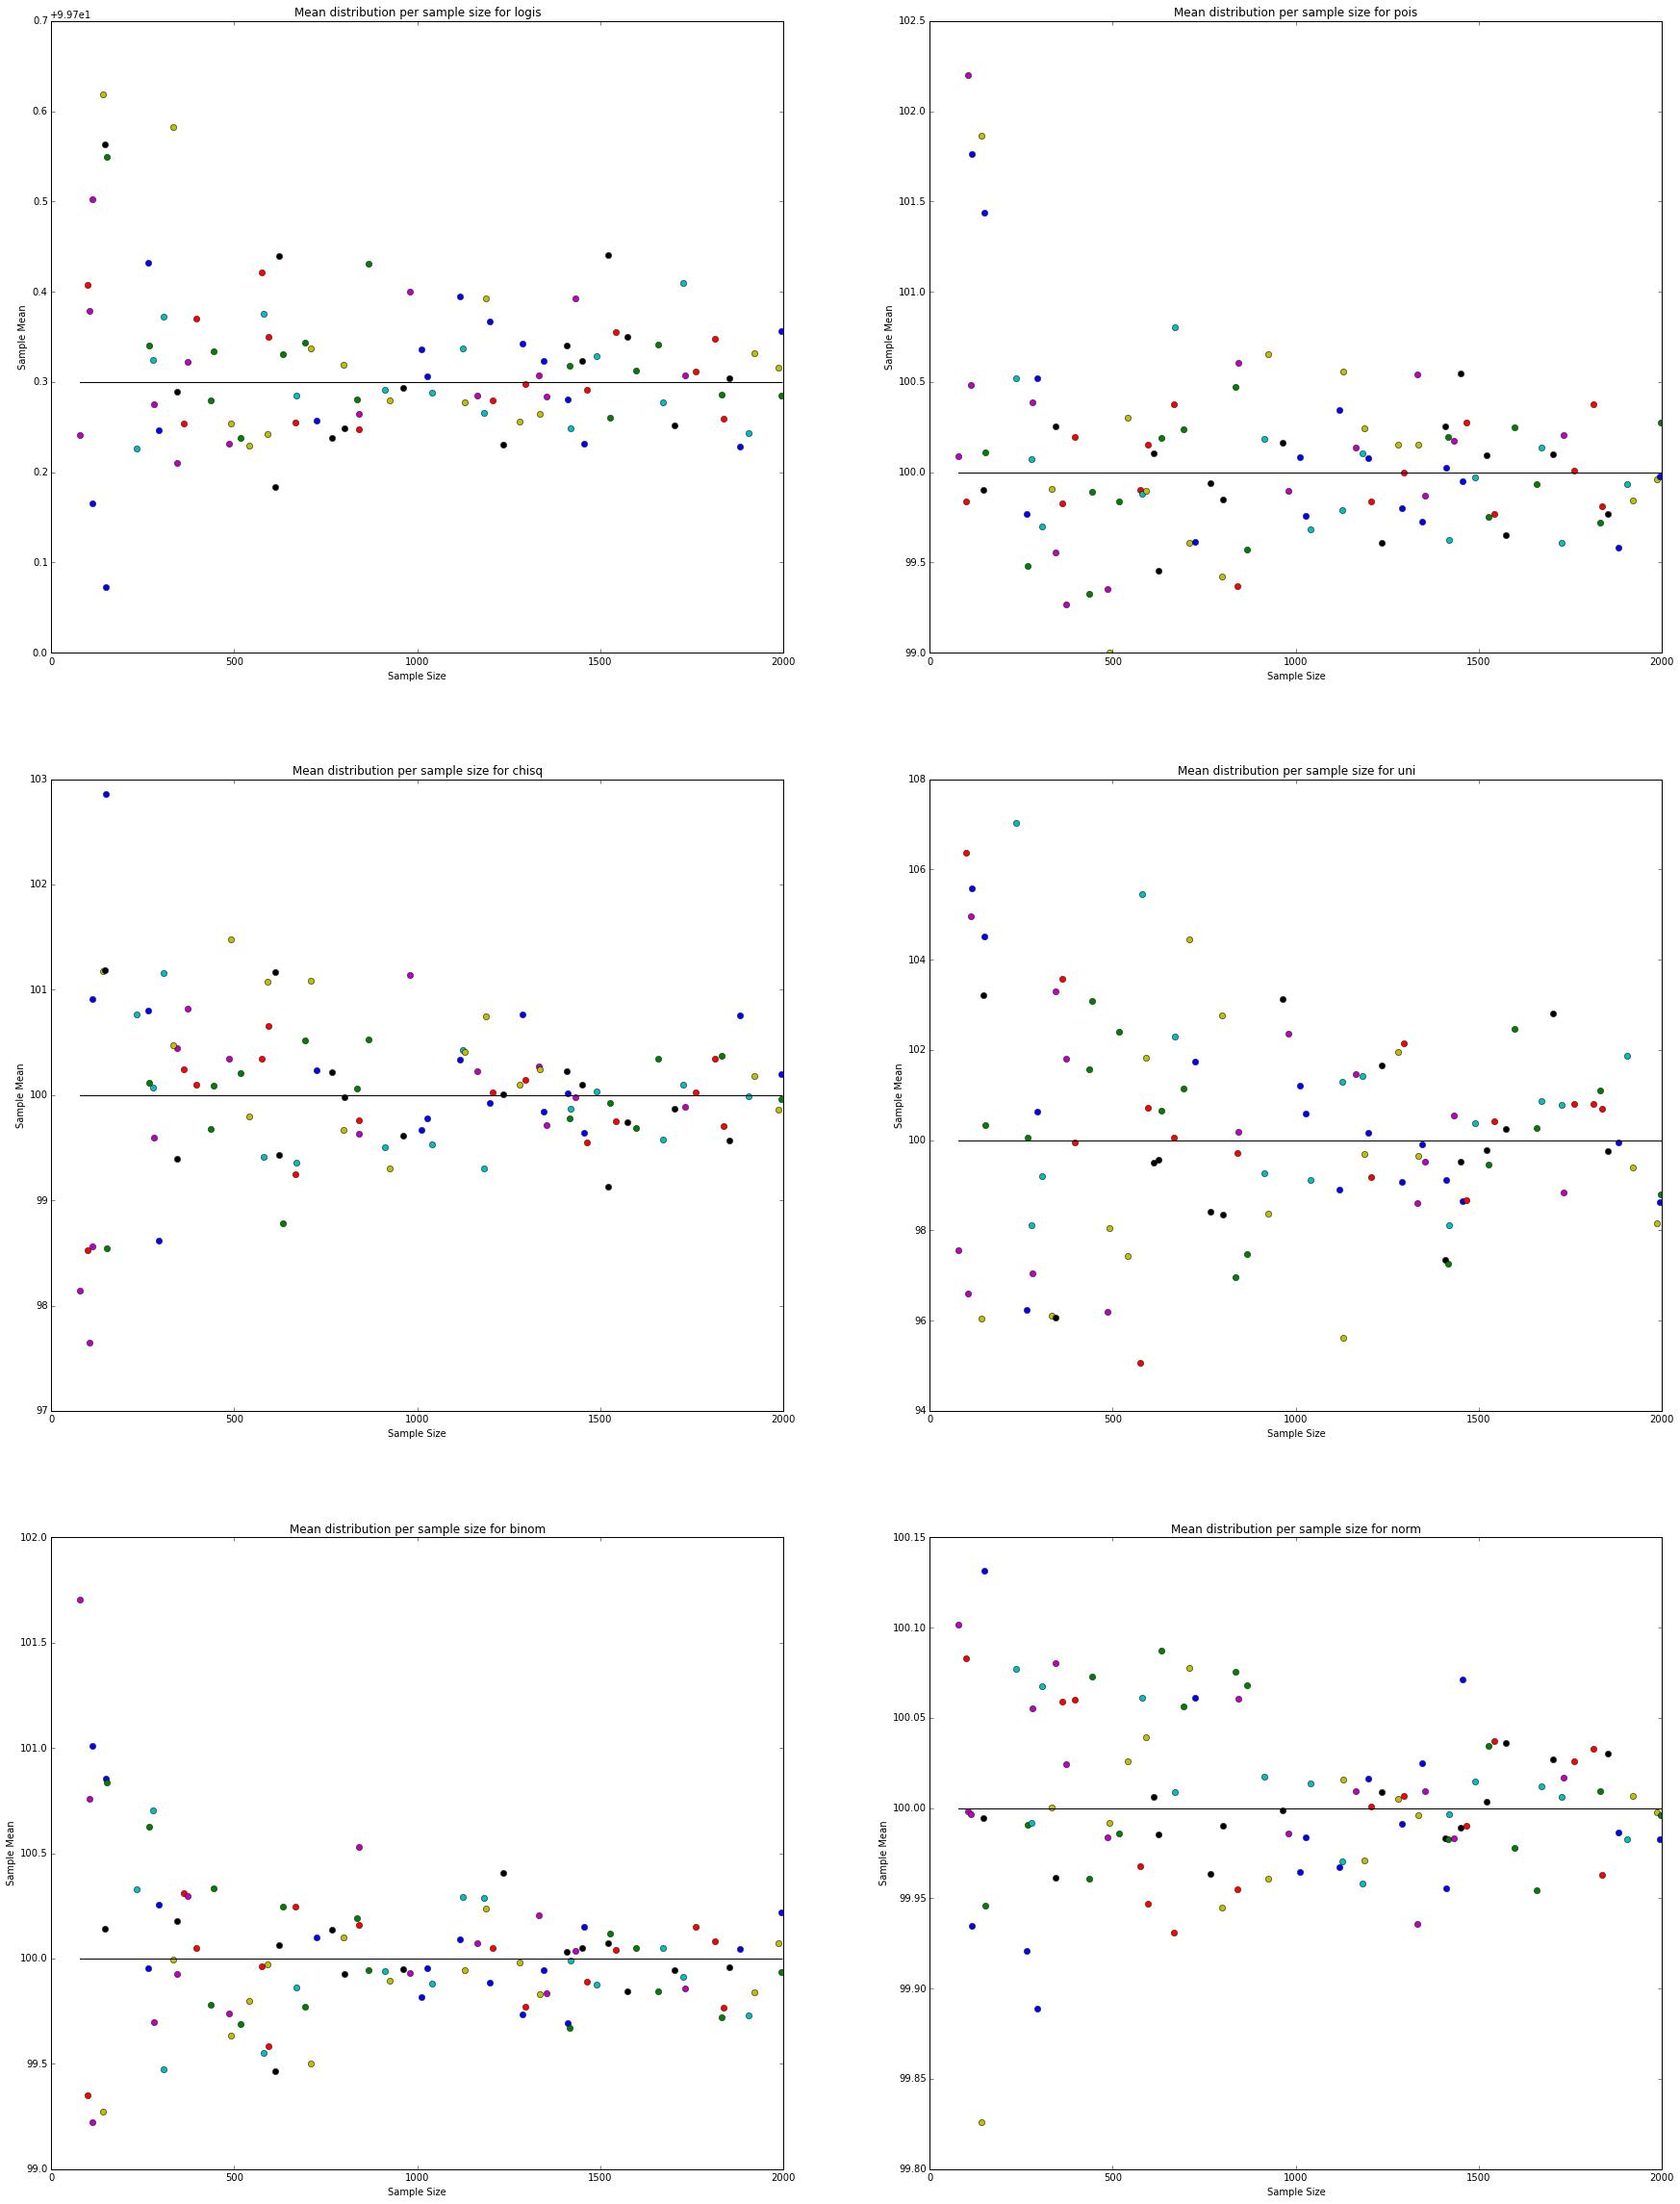

In [6]:
means = {} # add a dictionary within the dictionary to store dists
means['chisq'] = {}
means['norm'] = {}
means['pois'] = {}
means['binom'] = {}
means['logis'] = {}
means['uni'] = {}
fig = pl.figure(figsize=(30,40))
j = 0
for dict in dist:
    j += 1
    k = dict
    ax_mu = 'ax_mu_%s' %(k)
    title = 'Mean distribution per sample size for %s' %(k)
    for i in dist[k].iterkeys():
        ax_mu = fig.add_subplot(3,2,j)
        means[k][i] = dist[k][i].mean()
        ax_mu.plot(i, means[k][i], 'o')
        ax_mu.set_xlabel('Sample Size')
        ax_mu.set_ylabel('Sample Mean')
        ax_mu.plot([min(sizes),max(sizes)],[M,M],'k')
        ax_mu.set_title(title)


Can you describe the behavior you see in the plots?

The uniform, Poisson, and chi-square distributions have the largest spread at first. 
Smaller sample sizes show more errors and variance, thereby differing from 
the actual mean. The degree to which the observed mean differs from the 
actual mean is different for each of the six distributions provided that the 
sample size is small, but they ultimately converge as the sample size increases.

Creating Histograms

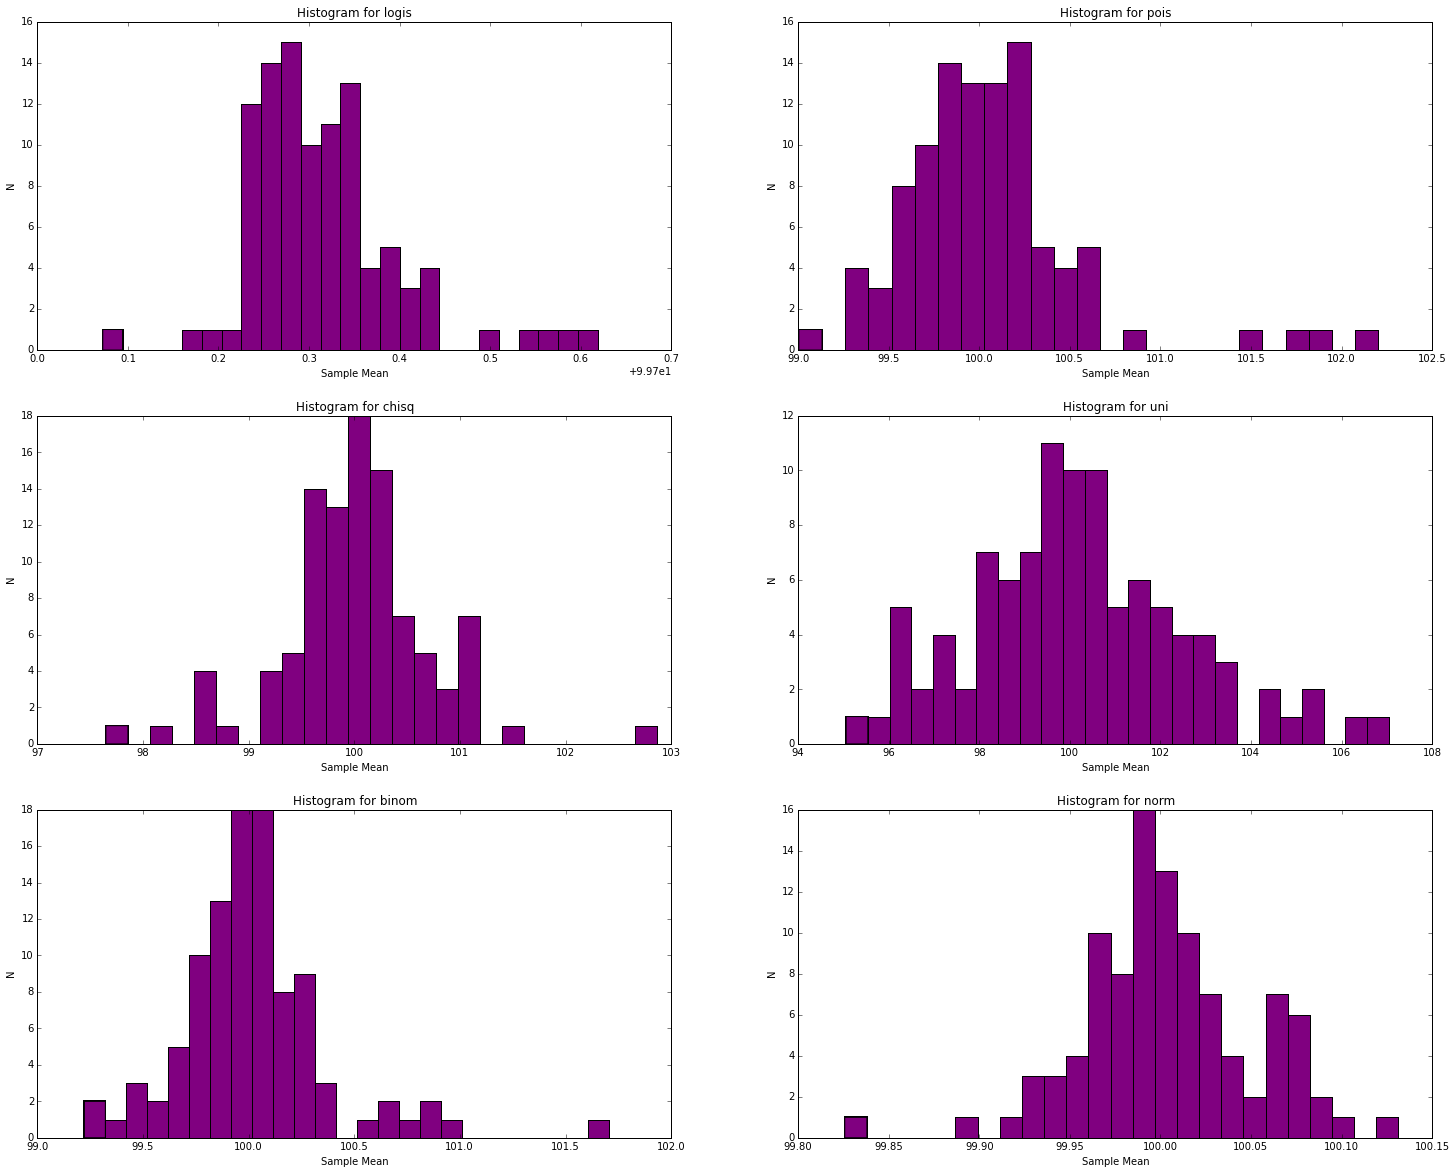

In [7]:
fig = pl.figure(figsize =(25,20))
j = 0
for dict in dist:
    j += 1
    k = dict
    tot = 'tot_%s' %(k)
    tot = []
    ax_mu = 'ax_mu %s' %(k)
    title = 'Histogram for %s' %(k)
    for n in means[k]:
        tot.append(means[k][n])
    for i in dist[k].iterkeys():
        ax_mu = fig.add_subplot(3,2,j)
        pl.hist(tot,bins=25,color ='purple')
        pl.xlabel('Sample Mean')
        pl.ylabel('N')
        pl.title(title)

In [8]:
# create a new copy of the list - cannot call tot_%s outside of the for loop (?)

tot_chisq = []
tot_norm = []
tot_pois = []
tot_binom = []
tot_logis = []
tot_uni = []

for n in means['chisq']:
    tot_chisq.append(means['chisq'][n])
for n in means['norm']:
    tot_norm.append(means['norm'][n])
for n in means['pois']:
    tot_pois.append(means['pois'][n])
for n in means['binom']:
    tot_binom.append(means['binom'][n])
for n in means['logis']:
    tot_logis.append(means['logis'][n])
for n in means['uni']:
    tot_uni.append(means['uni'][n])

In [9]:
# create dataframe for easier plotting

tot_chisq = pd.Series(tot_chisq, name = 'tot_chisq')
tot_norm = pd.Series(tot_norm, name = 'tot_norm')
tot_pois = pd.Series(tot_pois, name = 'tot_pois')
tot_binom = pd.Series(tot_binom, name = 'tot_binom')
tot_logis = pd.Series(tot_logis, name = 'tot_logis')
tot_uni = pd.Series(tot_uni, name = 'tot_uni')
data = pd.concat([tot_chisq,tot_norm,tot_pois,tot_binom,tot_logis,tot_uni], axis =1)
data = pd.DataFrame(data)

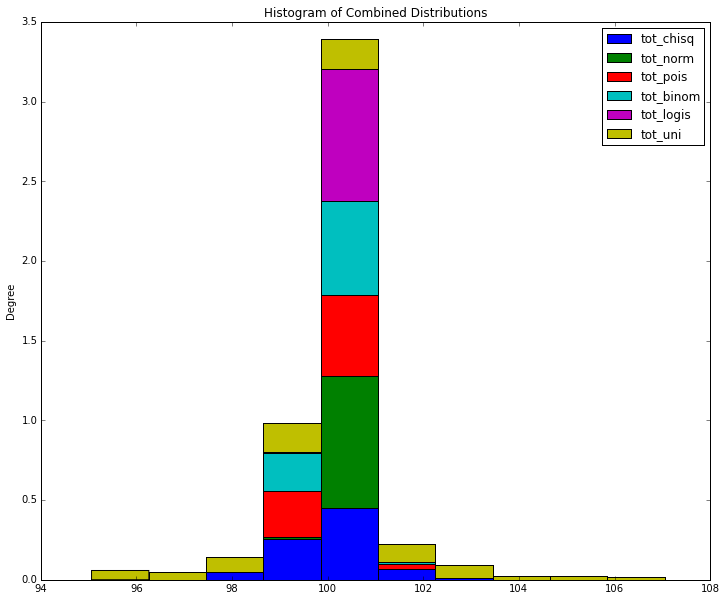

In [10]:
# now we plot the overlay
data.plot(kind='hist',figsize = (12,10),stacked=True, title = 'Histogram of Combined Distributions',normed=True)


Individual Histograms

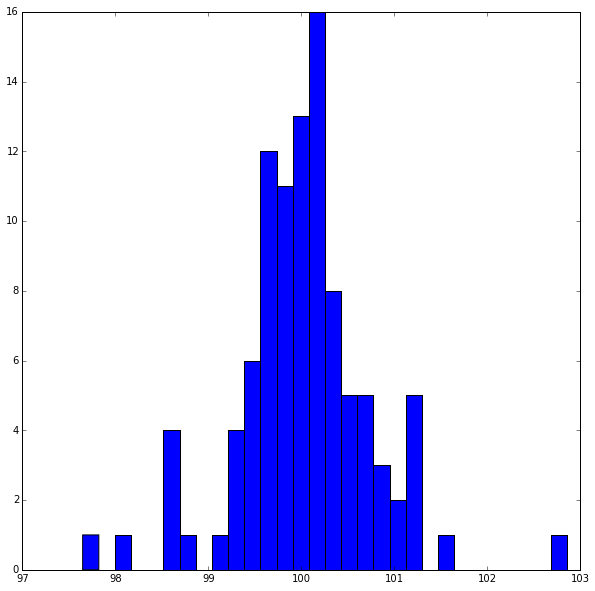

In [11]:
# chi-square
pl.figure(figsize=(10,10))
pl.hist(tot_chisq,bins=30)
pl.xlabel=('$\mu')
pl.ylabel=('$N$')
pl.title=('Histogram of Means for the Chi-Square Distribution')

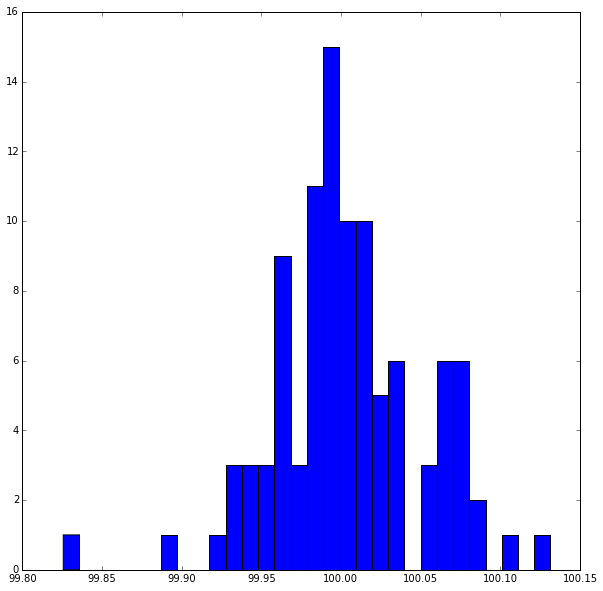

In [12]:
# normal/gaussian distribution
pl.figure(figsize=(10,10))
pl.hist(tot_norm,bins=30)
pl.xlabel=('$\mu')
pl.ylabel=('$N$')
pl.title=('Histogram of Means for the Normal/Gaussian Distribution')

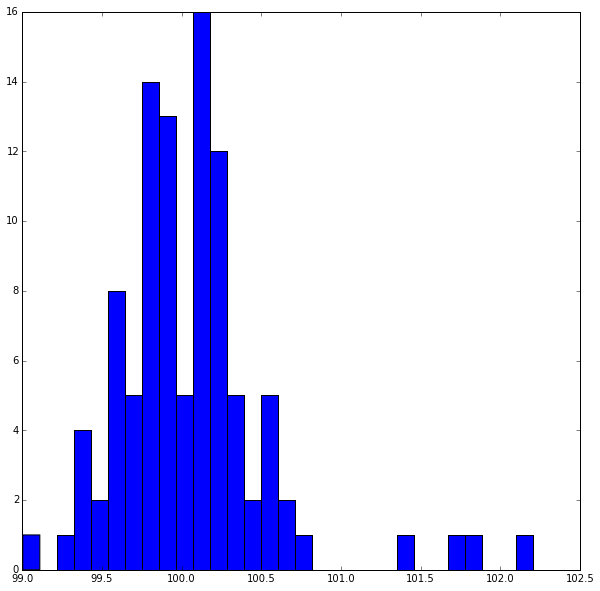

In [13]:
# poisson distribution
pl.figure(figsize=(10,10))
pl.hist(tot_pois,bins=30)
pl.xlabel=('$\mu')
pl.ylabel=('$N$')
pl.title=('Histogram of Means for the Poisson Distribution')

In [14]:
# binomial distribution
pl.figure(figsize=(10,10)
pl.hist(tot_binom,bins=30)
pl.xlabel=('$\mu')
pl.ylabel=('$N$')
pl.title=('Histogram of Means for the Binomial Distribution')

SyntaxError: invalid syntax (<ipython-input-14-90859c86184f>, line 3)

In [ ]:
# logistic distribution
pl.figure(figsize=(10,10))
pl.hist(tot_logis,bins=30)
pl.xlabel=('$\mu')
pl.ylabel=('$N$')
pl.title=('Histogram of Means for the Logistic Distribution')

In [ ]:
# uniform distribution
pl.figure(figsize=(10,10))
pl.hist(tot_uni,bins=30)
pl.xlabel('$\mu')
pl.ylabel('$N$')
pl.title('Histogram of Means for the Uniform Distribution')

Conclusion:
Plotting the histograms for each distribution individually graphically proves the Central Limit Theorem: the mean of a large number of independent random samples will be normally distributed regardless of the underlying distribution.

Extra Credit: fitting a gaussian distribution of means

In [ ]:
fig = pl.figure(figsize=((10,10)))
chisq = fig.add_subplot(3,2,1)
pl.boxplot(tot_chisq)
#pl.ylabel('Mean Value')
#pl.title('Boxplot of Means for the Chi-Square Distribution')

norm = fig.add_subplot(3,2,2)
pl.boxplot(tot_norm)
#pl.ylabel('Mean Value')
#pl.title('Boxplot of Means for the Nomral Distribution')

pois = fig.add_subplot(3,2,3)
pl.boxplot(pois)
#pl.ylabel('Mean Value')
#pl.title('Boxplot of Means for the Poisson Distribution')


